In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold

import scipy as sp

import statistics as st

In [43]:
data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
data = data.drop(['Location Code', 'State', 'Response', 'Gender', 'Effective To Date', 'EmploymentStatus'], axis=1)

# data.info()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Coverage                       9134 non-null   object 
 3   Education                      9134 non-null   object 
 4   Income                         9134 non-null   int64  
 5   Marital Status                 9134 non-null   object 
 6   Monthly Premium Auto           9134 non-null   int64  
 7   Months Since Last Claim        9134 non-null   int64  
 8   Months Since Policy Inception  9134 non-null   int64  
 9   Number of Open Complaints      9134 non-null   int64  
 10  Number of Policies             9134 non-null   int64  
 11  Policy Type                    9134 non-null   object 
 12  Policy                         9134 non-null   o

In [45]:
# data = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
categorical_df = data.select_dtypes(include='object')

categorical_df.columns

cat_df = categorical_df

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for col in cat_df.columns:
    cat_df[col] = lb.fit_transform(cat_df[col])
cat_df

,Customer,Coverage,Education,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,600,0,0,1,0,2,0,0,5,1
1,5946,1,0,2,1,5,2,0,0,1
2,96,2,0,1,1,5,0,0,5,1
3,8016,0,0,1,0,1,0,2,3,1
4,2488,0,0,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9129,3857,0,0,1,1,3,1,3,0,1
9130,5390,1,1,0,0,2,0,1,0,1
9131,6688,1,0,2,0,1,0,1,0,1
9132,7214,1,1,1,1,4,2,1,0,0


[20.89 33.87 45.29 56.66 67.94 78.69 89.34 98.66 99.99]


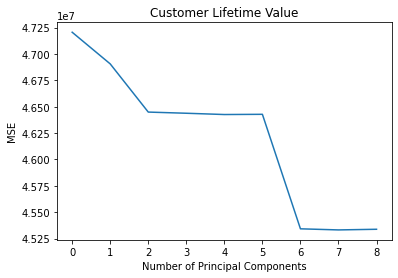

In [52]:

x = cat_df
x = x.drop(['Customer'], axis = 1)
a = x.columns
y = data[['Customer Lifetime Value']]
pca = PCA()
x_reduced = pca.fit_transform(scale(x))
cv = RepeatedKFold(n_splits = 11, n_repeats = 4, random_state = 1)
regr = LinearRegression()
mse = []
list1 = []
list
#Calculate MSE using Cross-Validation, adding one component at a time
for i in np.arange(1,10):
    list1.append(a[i-1])
    score = -1*model_selection.cross_val_score(regr, x_reduced[:,:i], y, cv=cv, scoring = 'neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Customer Lifetime Value')
b =np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
 
print(b)

plt.savefig('elbow_plot_2.png')

In [47]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Customer          9134 non-null   int64
 1   Coverage          9134 non-null   int64
 2   Education         9134 non-null   int64
 3   Marital Status    9134 non-null   int64
 4   Policy Type       9134 non-null   int64
 5   Policy            9134 non-null   int64
 6   Renew Offer Type  9134 non-null   int64
 7   Sales Channel     9134 non-null   int64
 8   Vehicle Class     9134 non-null   int64
 9   Vehicle Size      9134 non-null   int64
dtypes: int64(10)
memory usage: 713.7 KB


In [50]:
print(b)
c = []
d1 = []
for i in np.arange(1,9):
    c.append(b[i]-b[i-1])

d1.append(b[0])
for i in np.arange(0,8
                  ):
    d1.append(c[i])


[20.89 33.87 45.29 56.66 67.94 78.69 89.34 98.66 99.99]


In [51]:
print("This table will show the variable importance by predictor")
for l, d in zip(list1,d1):
    print("{} - {}".format(l,(d)))

This table will show the variable importance by predictor
Coverage - 20.89
Education - 12.980000000000004
Marital Status - 11.420000000000002
Policy Type - 11.369999999999997
Policy - 11.279999999999994
Renew Offer Type - 10.75
Sales Channel - 10.650000000000006
Vehicle Class - 9.319999999999993
Vehicle Size - 1.3299999999999983


In [55]:
df = pd.DataFrame(list(zip(list1,d1)),
              columns=["Predictors", "Importance"])

In [56]:
df

,Predictors,Importance
0,Coverage,20.89
1,Education,12.98
2,Marital Status,11.42
3,Policy Type,11.37
4,Policy,11.28
5,Renew Offer Type,10.75
6,Sales Channel,10.65
7,Vehicle Class,9.32
8,Vehicle Size,1.33


In [57]:
df.to_csv("Features_S3.csv")

In [35]:
from tabulate import tabulate
 
# assign data
mydata = [
    ['a', 'b', 'c'],
      [12, 34, 56],
      ['Geeks', 'for', 'geeks!']
]
 
col_headers = ["Predictors", "Importance"]
merged_array = np.array([list1, d1]).T
table = tabulate(merged_array , col_headers,tablefmt="grid")
print(table)

+----------+-----------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
|          |           |                  |                   |                   |                   |                   | Predictors        | Importance        |
+==========+===========+==================+===================+===================+===================+===================+===================+===================+
| Coverage | Education | EmploymentStatus | Marital Status    | Policy Type       | Policy            | Renew Offer Type  | Sales Channel     | Vehicle Class     |
+----------+-----------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+
| 17.1     | 12.39     | 10.25            | 9.369999999999997 | 9.329999999999998 | 9.049999999999997 | 8.989999999999995 | 8.700000000000003 | 7.659999999999997 |
+----------+----

/var/folders/d7/6rnrvvkn0gx0fk0d668z6ydr0000gn/T/ipykernel_10425/869601584.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  merged_array = np.array([list1, d1])


In [25]:
print(tabulate)

<function tabulate at 0x7fc3c5598940>
